### Identificando Outliers (Valores Extremos)

In [1]:
# Importando os pacotes que iremos utilizar
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Documentação do conjunto de dados
#https://archive.ics.uci.edu/ml/datasets/wine

# Carregando o conjunto de dados
df_original = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", sep = ",")

# Nomeando as colunas do conjunto de dados
df_original.columns = ['CLASS','ALCOHOL','MALICACID','ASH','ASHALCALINITY','MAGNESIUM','TOTALPHENOLS','FLAVONOIDS',
                      'NONFLAVONOIDSPHENOLS','PRONTHOCYANINS','COLORINTENSITY','HUE','OD280_OD315','PROLINE']


# Visualizando as primeiras linhas do arquivo
df_original.head()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
# Verificando as informações das variaveis e do conjunto de dados
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLASS                 177 non-null    int64  
 1   ALCOHOL               177 non-null    float64
 2   MALICACID             177 non-null    float64
 3   ASH                   177 non-null    float64
 4   ASHALCALINITY         177 non-null    float64
 5   MAGNESIUM             177 non-null    int64  
 6   TOTALPHENOLS          177 non-null    float64
 7   FLAVONOIDS            177 non-null    float64
 8   NONFLAVONOIDSPHENOLS  177 non-null    float64
 9   PRONTHOCYANINS        177 non-null    float64
 10  COLORINTENSITY        177 non-null    float64
 11  HUE                   177 non-null    float64
 12  OD280_OD315           177 non-null    float64
 13  PROLINE               177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
# Verificando algumas medidas estatísticas
df_original.describe()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
# Fazendo um SLICE(Fatiando) no DataFrame e obtendo TODAS AS LINHAS, porém desconsiderando a COLUNA 0 que é a variavel TARGET
df2 = df_original.iloc[:,1:14]
df2.head()

,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


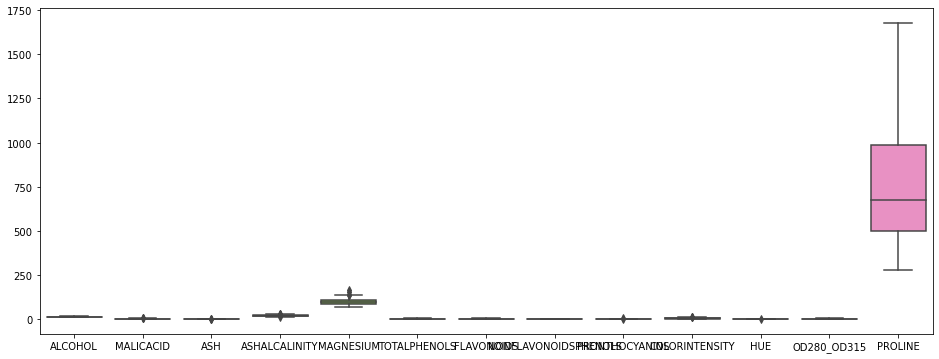

In [6]:
# Ajustando tamanho da figura e plotando todos boxplots
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df2)

In [7]:
# Verificando informações do DF2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ALCOHOL               177 non-null    float64
 1   MALICACID             177 non-null    float64
 2   ASH                   177 non-null    float64
 3   ASHALCALINITY         177 non-null    float64
 4   MAGNESIUM             177 non-null    int64  
 5   TOTALPHENOLS          177 non-null    float64
 6   FLAVONOIDS            177 non-null    float64
 7   NONFLAVONOIDSPHENOLS  177 non-null    float64
 8   PRONTHOCYANINS        177 non-null    float64
 9   COLORINTENSITY        177 non-null    float64
 10  HUE                   177 non-null    float64
 11  OD280_OD315           177 non-null    float64
 12  PROLINE               177 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.1 KB


ALCOHOL : float64
MALICACID : float64
ASH : float64
ASHALCALINITY : float64
MAGNESIUM : int64
TOTALPHENOLS : float64
FLAVONOIDS : float64
NONFLAVONOIDSPHENOLS : float64
PRONTHOCYANINS : float64
COLORINTENSITY : float64
HUE : float64
OD280_OD315 : float64
PROLINE : int64


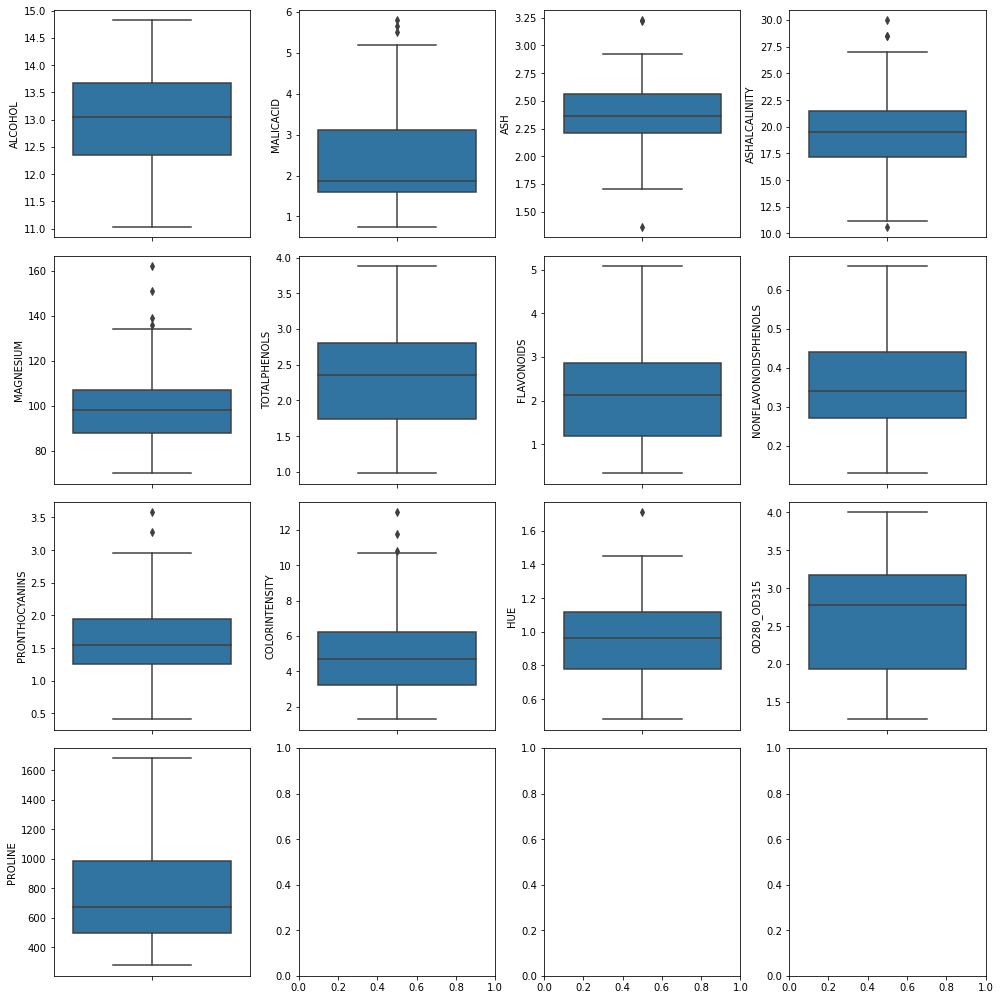

In [8]:
#carregar variaveis para plot
variaveis_numericas = []
for i in df2.columns[0:13].tolist():
        if df2.dtypes[i] == 'int64' or df2.dtypes[i] == 'float64':            
            print(i, ':' , df2.dtypes[i]) 
            variaveis_numericas.append(i)
  
    
    
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(4, 4) #4 linhas e 3 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df2, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show() 

### Identificando Outliers com a Biblioteca PYOD

In [9]:
# Caso ainda não tenha instalado a biblioteca PYOD para instalar digite: !pip install pyod

# Importando o pacote PYOD
from pyod.models.knn import KNN

In [10]:
# Instanciando o objeto KNN
detector = KNN()

# Treinando um detector de OUTLIERS
detector.fit(df2)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [11]:
# A probiedade LABELS_ retorna um ARRAY com 0 e 1
# 0 significa que NÃO é outlier
# 1 significa que É outlier
previsoes = detector.labels_
previsoes

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [12]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([159,  18], dtype=int64))

In [13]:
# Observando o calculo da distancia realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([ 16.07347193,  56.80227196, 105.04076923,  24.39890366,
        97.57531911,  21.07325556,  25.68652565,  13.4260791 ,
        13.70629053, 135.37838712,  14.16789328,  39.87014547,
        44.85748321, 133.22215582,  27.88866616,  23.63898898,
        35.47067098, 230.04751835,  20.68035783,  34.26311282,
        26.29039939,  15.4192088 ,  26.61060691,  26.16700013,
        29.07232189,  55.97645755,  17.17973807,  37.48960923,
        15.24984262,  16.11041278, 140.3062422 ,  37.62846396,
        50.01395605,  31.29790568,  41.54923345,  25.75794052,
        30.42083661,  25.18542237,  28.10955531,  36.90437914,
        17.49295001,  30.09915613,   9.78619947,  30.12398878,
        21.6970574 ,  20.66095109,  40.6095112 ,  16.90997635,
        25.10981681,  44.35228743,  21.86238093,  50.01395605,
        87.14726789,  25.05084031,  39.28731602,  53.33071441,
        16.20816461,  14.43268513,  15.60180438,   8.77615519,
        20.70472168,  17.19380702,  13.47344054,  21.40

In [14]:
# Criando uma lista somente com os outliers
outliers = []
for i in range(len(previsoes)):
    #print(i)
    if previsoes[i] == 1:
        outliers.append(i)

In [15]:
# Lista com os ID´s dos registros que foram considerados OUTLIERS
print(outliers)

[1, 2, 4, 9, 12, 13, 17, 25, 30, 32, 51, 52, 55, 68, 72, 79, 92, 94]


In [16]:
# Fazendo um SLICE no arquivo original filtrando todas as linhas que são outlier (lista de outlier) e todas colunas
lista_outliers = df_original.iloc[outliers,:]
lista_outliers

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
12,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
13,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
17,1,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680
25,1,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195
30,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
32,1,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235


In [17]:
lista_outliers.shape

(18, 14)